## Preliminary exploratory data analysis

In [3]:
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
library(rsample)   
library(caret)     
library(pROC)  
library(dplyr)
library(ggplot2)
install.packages("caret")
library(caret)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [70]:
#First we need to read the data from url, assignes col names and types.
cleveland_data<-read_csv( "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                col_names=c("age",
                     "sex",
                     "cp",
                     "trestbps",
                     "chol",
                     "fbs",
                     "restecg",
                     "thalach",
                     "exang",
                     "oldpeak",
                     "slope",
                     "ca",
                     "thal",
                     "num"), 
               col_types=list("d","d","d","d","d","d","d","d","d","d","d","f","f","d"))

#Now we can cleaning and wrangling data
cleveland_data[cleveland_data=="?"]<-NA
cleveland_new<-cleveland_data|>
    mutate(diag=ifelse(is.na(num),NA,(num>0)))|>
    mutate(sex=as.factor(as.integer(sex)),
           fbs=as.factor(as.integer(fbs)),restecg=as.factor(as.integer(restecg)),
           exang=as.factor(as.integer(exang)),thal=as.factor(as.integer(thal)),
           ca=as.factor(as.integer(ca)),slope=as.factor(as.integer(slope)),
           diag=as.factor(as.integer(diag)))


#Splitting dataframe into training and testing datasets
cleveland_split<-initial_split(cleveland_new,prop=3/4,strata=num)
cleveland_training<-training(cleveland_split)
cleveland_testing<-testing(cleveland_split)


cleveland_training


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diag
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>
37,1,3,130,250,0,0,187,0,3.5,3,1,2,0,0
41,0,2,130,204,0,2,172,0,1.4,1,1,2,0,0
57,0,4,120,354,0,0,163,1,0.6,1,1,2,0,0
57,1,4,140,192,0,0,148,0,0.4,2,1,1,0,0
44,1,2,120,263,0,0,173,0,0.0,1,1,3,0,0
52,1,3,172,199,1,0,162,0,0.5,1,1,3,0,0
57,1,3,150,168,0,0,174,0,1.6,1,1,2,0,0
54,1,4,140,239,0,0,160,0,1.2,1,1,2,0,0
48,0,3,130,275,0,0,139,0,0.2,1,1,2,0,0


In [71]:
#Summarize the dataframe to get max, min, and mean of trestbps

cleveland_summary <- cleveland_training|>
  group_by(sex, cp, diag)|>
  summarize(
    avg_trestbps = mean(trestbps, na.rm = TRUE),
    max_trestbps = max(trestbps, na.rm = TRUE),
    min_trestbps = min(trestbps, na.rm = TRUE),
    count = n()
  )|>
  ungroup()
cleveland_summary

`summarise()` has grouped output by 'sex', 'cp'. You can override using the
`.groups` argument.


sex,cp,diag,avg_trestbps,max_trestbps,min_trestbps,count
<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<int>
0,1,0,147.5000,150,140,4
0,2,0,124.2222,140,105,9
0,2,1,133.0000,136,130,2
0,3,0,129.2800,160,108,25
0,3,1,130.0000,130,130,1
0,4,0,129.4545,180,100,11
0,4,1,145.3158,180,108,19
1,1,0,139.7143,170,118,7
1,1,1,138.8000,170,110,5


- For both sexes, chest pain type 4 is associated with higher average resting blood pressure in patients diagnosed with heart disease compared to those without.
- This indicate that this type of chest pain, combined with higher blood pressure, is a significant risk factor for heart disease.

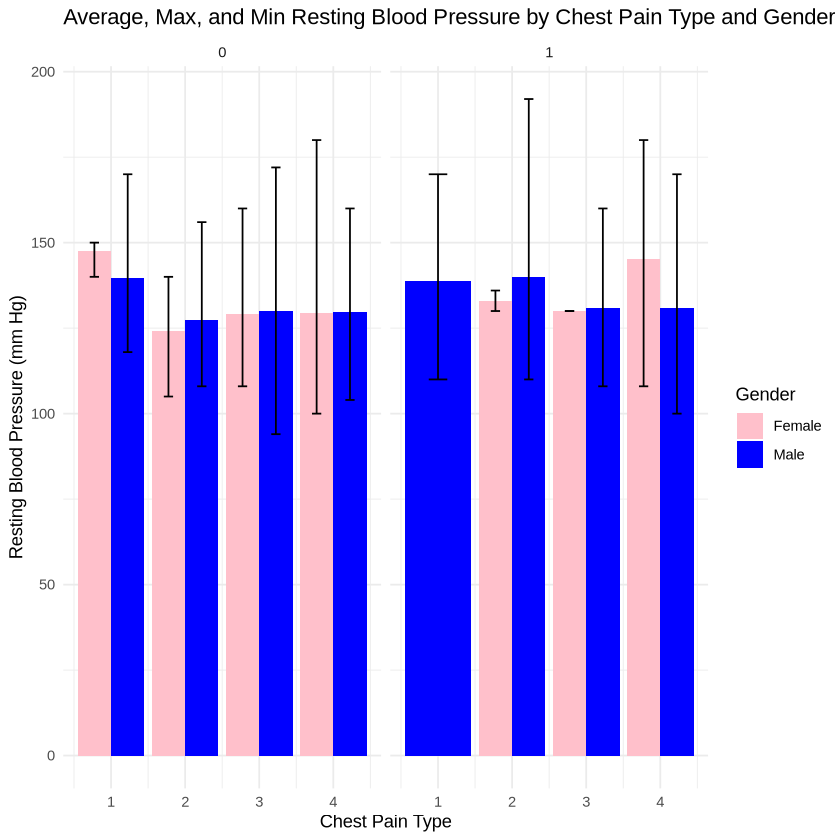

In [72]:
#Finally, we can plot the graph 
cleveland_plot <- ggplot(cleveland_summary, aes(x = cp, y = avg_trestbps, fill = sex)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  geom_errorbar(aes(ymin = min_trestbps, ymax = max_trestbps), width = 0.25, position = position_dodge(0.9)) +
  labs(title = "Average, Max, and Min Resting Blood Pressure by Chest Pain Type and Gender",
       x = "Chest Pain Type",
       y = "Resting Blood Pressure (mm Hg)",
       fill = "Gender") +
  scale_fill_manual(values = c("0" = "pink", "1" = "blue"), labels = c("Female", "Male")) +
  facet_wrap(~ diag) +
  theme_minimal()

print(cleveland_plot)



- The bar graph is a bar plot depicting average resting blood pressure stratified by chest pain type and further categorized by gender, with error bars indicating the minimum and maximum resting blood pressure observed in each group.
  
- The bar graph is a common visualization tool for comparing the average of numerical data across different categories. It makes it easy to compare the mean resting blood pressure across the different chest pain types and between genders. It also illustrates how average measurements differ for patients with and without heart disease, which is crucial for our goal.
  
- Our objective is to leverage this data to train a k-NN model for early detection of heart disease. The bar plot informs us about potentially significant predictors (chest pain type and resting blood pressure) that, along with other variables like age and sex, can be used to predict heart disease. Understanding these relationships and distributions helps in feature selection and understanding the data before applying k-NN.

In [73]:
#Now, we can do the k-nearest neighbor(knn). We only want diag, cp, and trestbps, so we need to select them.	

cleveland_train <- cleveland_training|>
  select(diag, cp, trestbps)
cleveland_train 



diag,cp,trestbps
<fct>,<dbl>,<dbl>
0,3,130
0,2,130
0,4,120
0,4,140
0,2,120
0,3,172
0,3,150
0,4,140
0,3,130


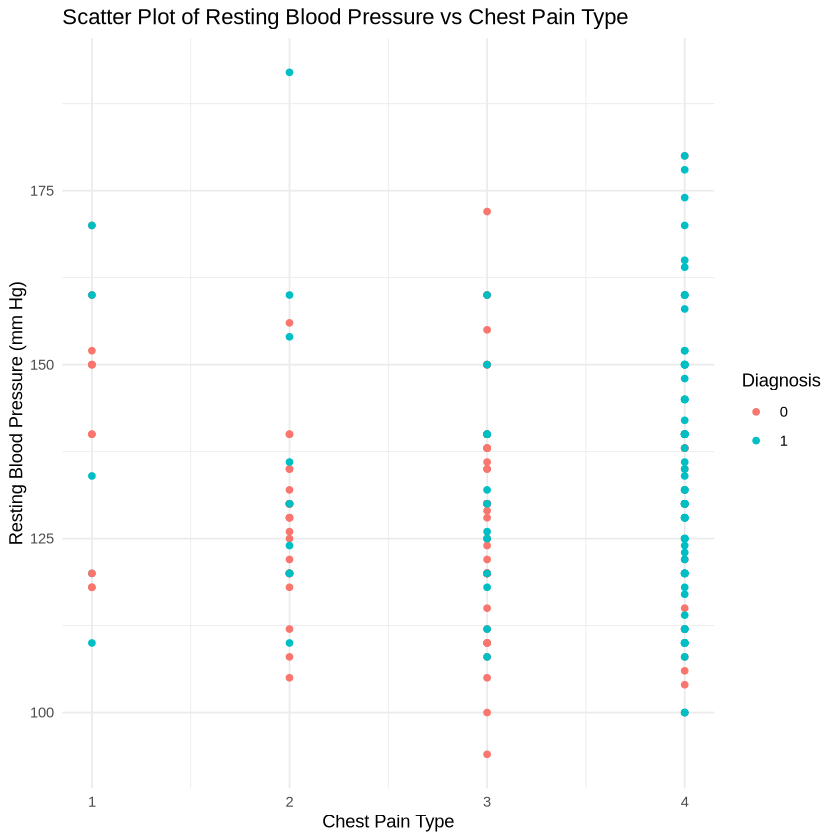

In [74]:
#Here I plot a scatter graph by using cleveland_train data, so we can do knn.

predict_plot<-cleveland_train|>
    ggplot(aes(x = as.numeric(cp), y = trestbps, color = diag)) +
  geom_point() + 
  labs(title = "Scatter Plot of Resting Blood Pressure vs Chest Pain Type",
       x = "Chest Pain Type",
       y = "Resting Blood Pressure (mm Hg)",
       color = "Diagnosis") +
  theme_minimal()  
predict_plot

- This scatter plot shows individual data points for resting blood pressure as a function of chest pain type, categorized by diagnosis status. Each dot represents an observation in the dataset.

In [63]:
#Next, we create a model for K-nearest neighbors classification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")
knn_spec


K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 3
  weight_func = rectangular

Computational engine: kknn 


In [65]:

knn_fit <- knn_spec |>
  fit(diag ~ cp+trestbps, data =cleveland_train)
knn_fit

parsnip model object


Call:
kknn::train.kknn(formula = diag ~ cp + trestbps, data = data,     ks = min_rows(3, data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.3274336
Best kernel: rectangular
Best k: 3

In [75]:
#Here is the unscale result, so next, we need to scale the data
new_obs <- tibble(cp = 2,trestbps =150)
predict(knn_fit, new_obs)

.pred_class
<fct>
0


In [98]:
# create the centering and scaling recipe
cl_recipe <- recipe(diag ~ cp+trestbps, data =cleveland_train )
cl_recipe <- cl_recipe |>
  step_scale(all_predictors()) |>
  step_center(all_predictors()) |>
  prep()
cl_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Training information 

Training data contained 226 data points and no incomplete rows.



── Operations 

• Scaling for: cp, trestbps | Trained

• Centering for: cp, trestbps | Trained



In [95]:
#Bake the data and get the scaled values
scaled_heart <- bake(cl_recipe, cleveland_train)
scaled_heart



cp,trestbps,diag
<dbl>,<dbl>,<fct>
-0.1688427,-0.1235176,0
-1.2287996,-0.1235176,0
0.8911142,-0.7038708,0
0.8911142,0.4568355,0
-1.2287996,-0.7038708,0
-0.1688427,2.3139657,0
-0.1688427,1.0371887,0
0.8911142,0.4568355,0
-0.1688427,-0.1235176,0


In [96]:
#Add the data to workflow
knn_fit <- workflow() |>
  add_recipe(cl_recipe) |>
  add_model(knn_spec) |>
  fit(data =cleveland_train )
knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2787611
Best kernel: rectangular
Best k: 3

In [97]:
#The final result( We can also change the value to see other predictions)
new_observation <- tibble(cp = c(0.8911142,
-2.2887565), 
                          trestbps = c(-0.1235176,-0.1235176))
prediction <- predict(knn_fit, new_observation)
prediction

.pred_class
<fct>
0
0


# Data Science group proposal

## Title: Predicting Heart Disease Presence using Cleveland Heart Disease Dataset

##### Name: Stella, Howard, Alaire, Chili

## Introduction:

According to the CCDSS, 14 Canadian adults (20 and over) with diagnosed heart disease die every hour. With heart disease being the second leading cause of mortality in Canada, early detection and diagnosis remain a crucial first step in improving patient outcomes. In this proposal, the K-Nearest Neighbors (k-NN) algorithm is used on the Cleveland Heart Disease dataset for binary classification of heart disease based on the predictive variables of age, sex (1 = male; 0 = female), chest pain type (1-4), and resting blood pressure (mm Hg). By leveraging existing data, we aim to train our model to deliver rapid and accurate heart disease diagnoses to alleviate physician workload. 



## Methods:

For our predictive task, we will employ the k-nearest neighbors (k-nn) algorithm for binary classification of heart disease presence in the Cleveland Heart Disease dataset. 
Predictor variables including age (in years), sex (1 = male; 0 = female), chest pain type (values 1-4), and resting blood pressure (in mm Hg on admission to the hospital) will be used for prediction of the predicted attribute “diag”.  Each column is numeric-valued, with 226 rows representing missing data as the string "?". We modified all “?” into NA to clean up the data. The 'num' column utilizes integers (1,2,3,4) to indicate the presence and '0' to indicate the absence of heart disease in patients. To simplify the diagnosis process, a new boolean column 'diag' as a factor has been added to classify the diagnoses strictly as 1 (for presence) or 0 (for absence).


## Expected outcomes and significance:

We expect to use existing data to predict future heart disease diagnoses. This finding could enhance diagnostic accuracy by avoiding errors in manual, case-by-case diagnoses. This model relies on real-world case comparisons, potentially revolutionizing healthcare by allowing rapid diagnoses. For instance, doctors might only need to measure resting blood pressure upon admission, with all other features pre-filled (sex, age, chest pain type). This could benefit patients with busy lifestyles. However, this raises questions about whether the dataset features are comprehensive enough for accurate diagnosis. To improve accuracy, further research is needed to identify additional features outside the dataset that influence heart disease.
